### Script to extract information from an article

In [1]:
from bs4 import BeautifulSoup
import requests
import re

In [2]:
# demo link 
link = "https://www.independent.co.uk/news/north-korea-ap-americans-south-korea-otto-warmbier-b2377894.html"
# demo lookup keyword
keyword = "north korea"

In [3]:
html_text = requests.get(link)
soup = BeautifulSoup(html_text.content.decode('utf-8'))

#### To Do:
- Extract article content, which means all `html` content tagged as `<p>` and `<li>`. Put all the words in a set for fast lookup
- Sentiment analysis of the content
- Summary of the content
- Trend analysis

## Keyword Extraction

In [29]:
# extract article 
body = soup.find_all('p')
lists = soup.find_all('li')
title = soup.find('title')

In [30]:
# combining the texts into one big chunk
text = ' '.join([p.text for p in body]) + " " + ' '.join([p.text for p in lists])

In [31]:
# extracting keywords in article using spacy
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
keywords = set(doc.ents)

### Summarization

### Sentiment Analysis

### Trend Analysis

In [32]:
# trend analysis
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [42]:
data = {'Year': np.arange(1950, 2000, 1), 
        'Polarity': np.arange(0, 50, 1), 
        'Subjectivity': [n**2 for n in np.arange(0, 50, 1)]}
df = pd.DataFrame(data)
df

,Year,Polarity,Subjectivity
0,1950,0,0
1,1951,1,1
2,1952,2,4
3,1953,3,9
4,1954,4,16
5,1955,5,25
6,1956,6,36
7,1957,7,49
8,1958,8,64
9,1959,9,81


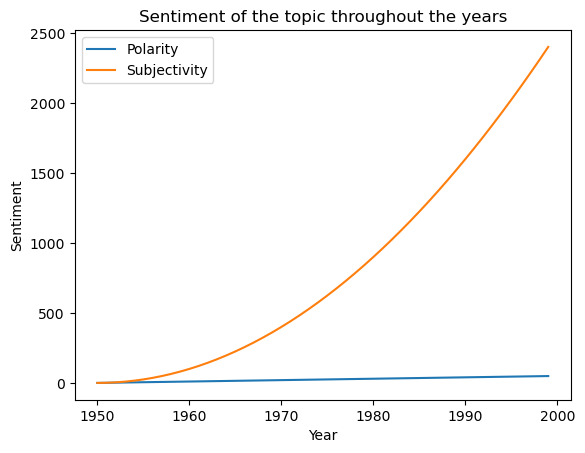

In [50]:
plt.plot(df['Year'], df['Polarity'], label='Polarity')
plt.plot(df['Year'], df['Subjectivity'], label='Subjectivity')
plt.xlabel("Year")
plt.ylabel("Sentiment")
plt.title("Sentiment of the topic throughout the years")
plt.legend()
plt.show()